## Part 2: EDA </br>

In this notebook we will be exploring some of the relationships between the features in our dataset. As a reminder, in part 1 we compiled a list of tracks from spotifys API pertaining to the artist Illenium. We utilized some of the functions within the API to grab the 20 closest related artists to Illenium and grab all of their top 10 tracks, along with all of the descriptive features of the tracks. Our goal in this project is to find what lead to the greatest popularity in songs.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import os.path

import warnings
warnings.simplefilter(action="ignore")
warnings.filterwarnings(action="ignore")

df = pd.read_csv('capstone3_data.csv', index_col=0)

In [2]:
df.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,49.926108,0.516118,0.704855,4.778325,-5.515015,0.650246,0.066450,0.159540,0.056921,0.174482,0.277636,131.895956,3.955665
std,7.919112,0.124206,0.145328,3.624056,1.946591,0.478071,0.056856,0.191306,0.163990,0.123614,0.163063,26.776472,0.268853
min,33.000000,0.150000,0.065600,0.000000,-14.564000,0.000000,0.025100,0.000208,0.000000,0.026100,0.038700,73.041000,1.000000
25%,45.000000,0.438000,0.625000,1.000000,-6.631000,0.000000,0.037350,0.023700,0.000000,0.098550,0.150000,114.500500,4.000000
50%,49.000000,0.515000,0.721000,4.000000,-5.416000,1.000000,0.046600,0.084900,0.000052,0.122000,0.251000,139.879000,4.000000
75%,55.000000,0.596500,0.799000,8.000000,-4.191500,1.000000,0.070250,0.235000,0.007915,0.210500,0.365500,149.918500,4.000000
max,76.000000,0.885000,0.975000,11.000000,-0.770000,1.000000,0.354000,0.927000,0.943000,0.739000,0.975000,207.147000,4.000000


First lets analyze typical popularity of songs by artists, to see which artists are most popular. The three artists with the most popular songs are Illenium, NGHTMRE, and Lost Kings.

<AxesSubplot:xlabel='feature_artist', ylabel='popularity'>

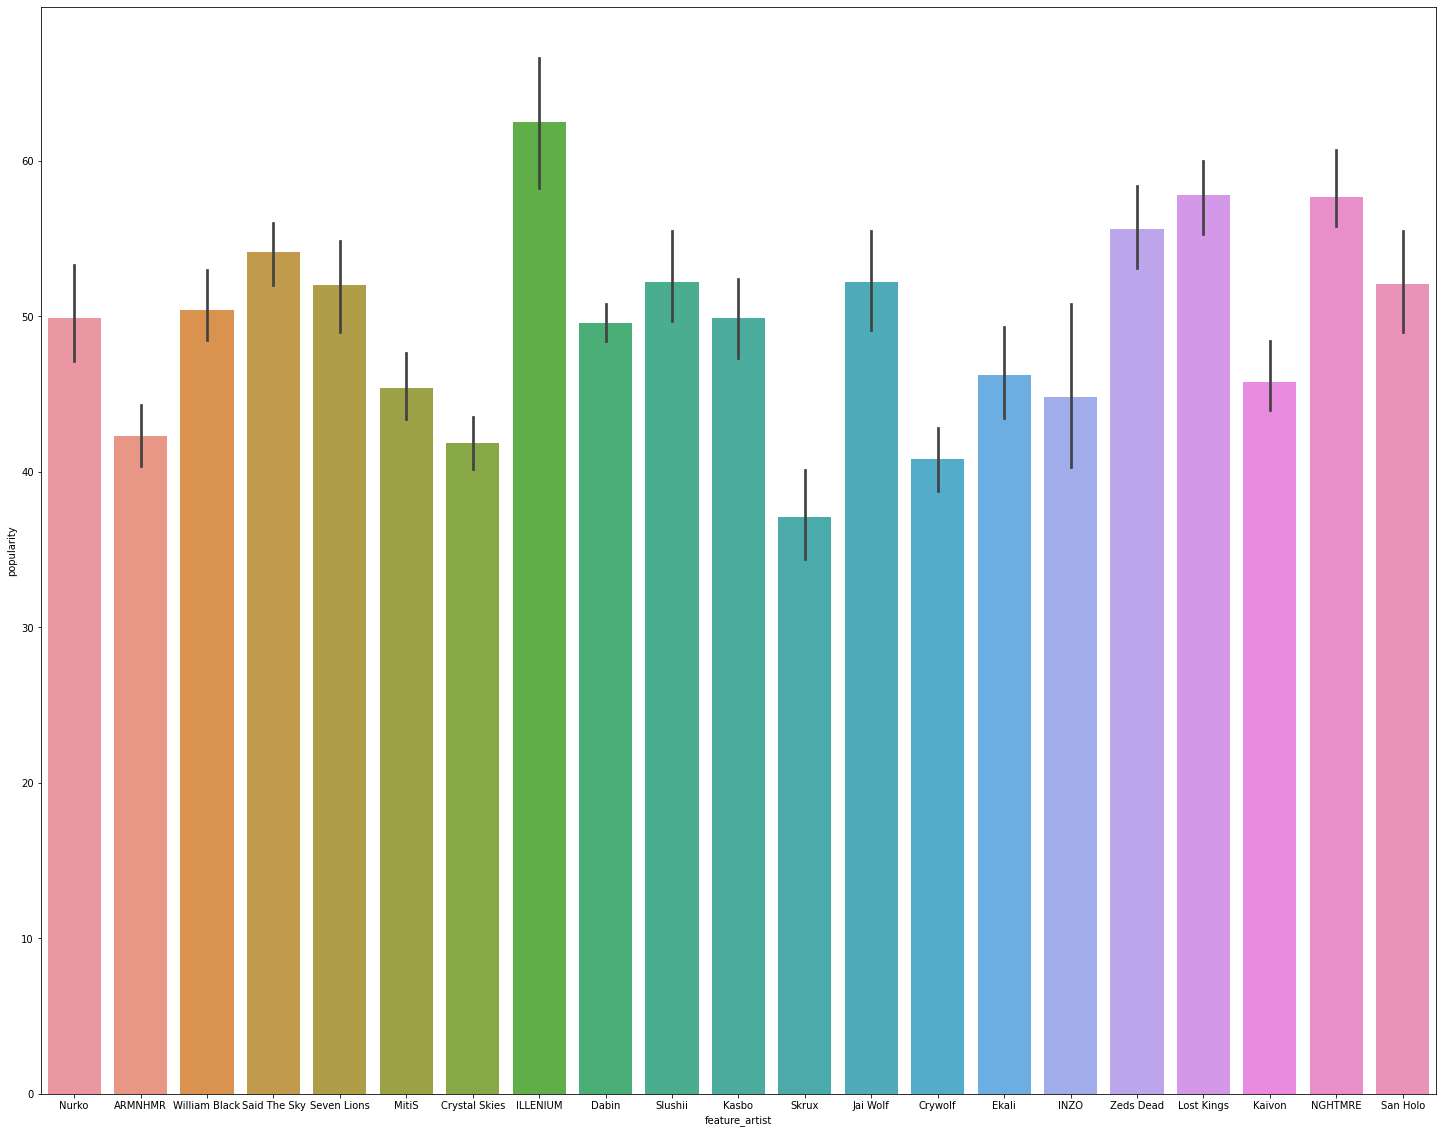

In [3]:
plt.figure(figsize=(25,20))
sns.barplot(x="feature_artist", y="popularity", data=df)

This is interesting, so lets dive into how all of the features relationships, first lets check feature relationship for all tracks.

<AxesSubplot:>

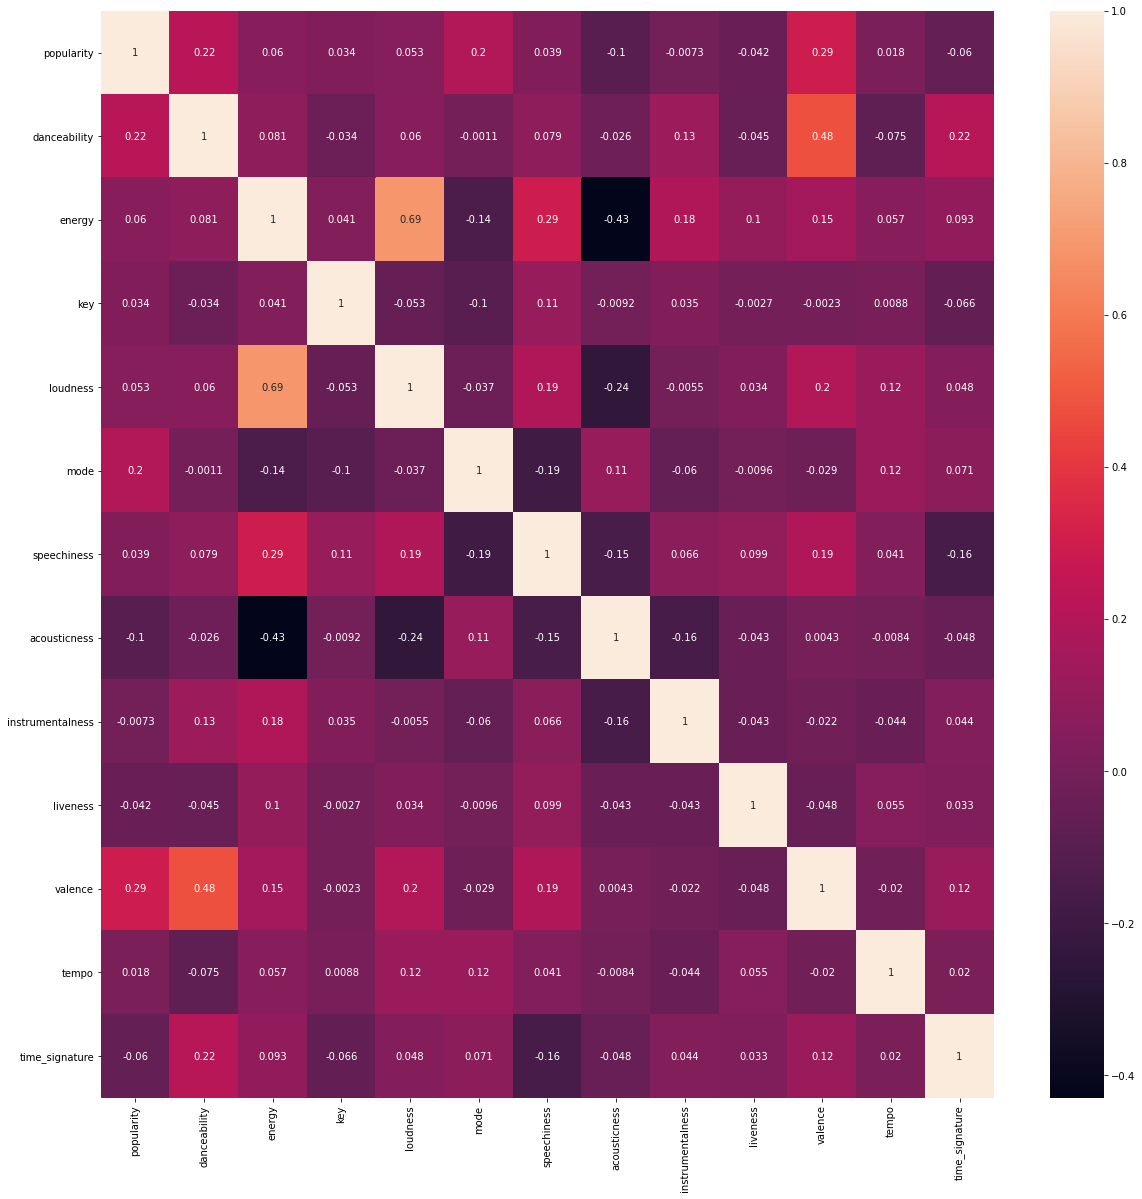

In [4]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

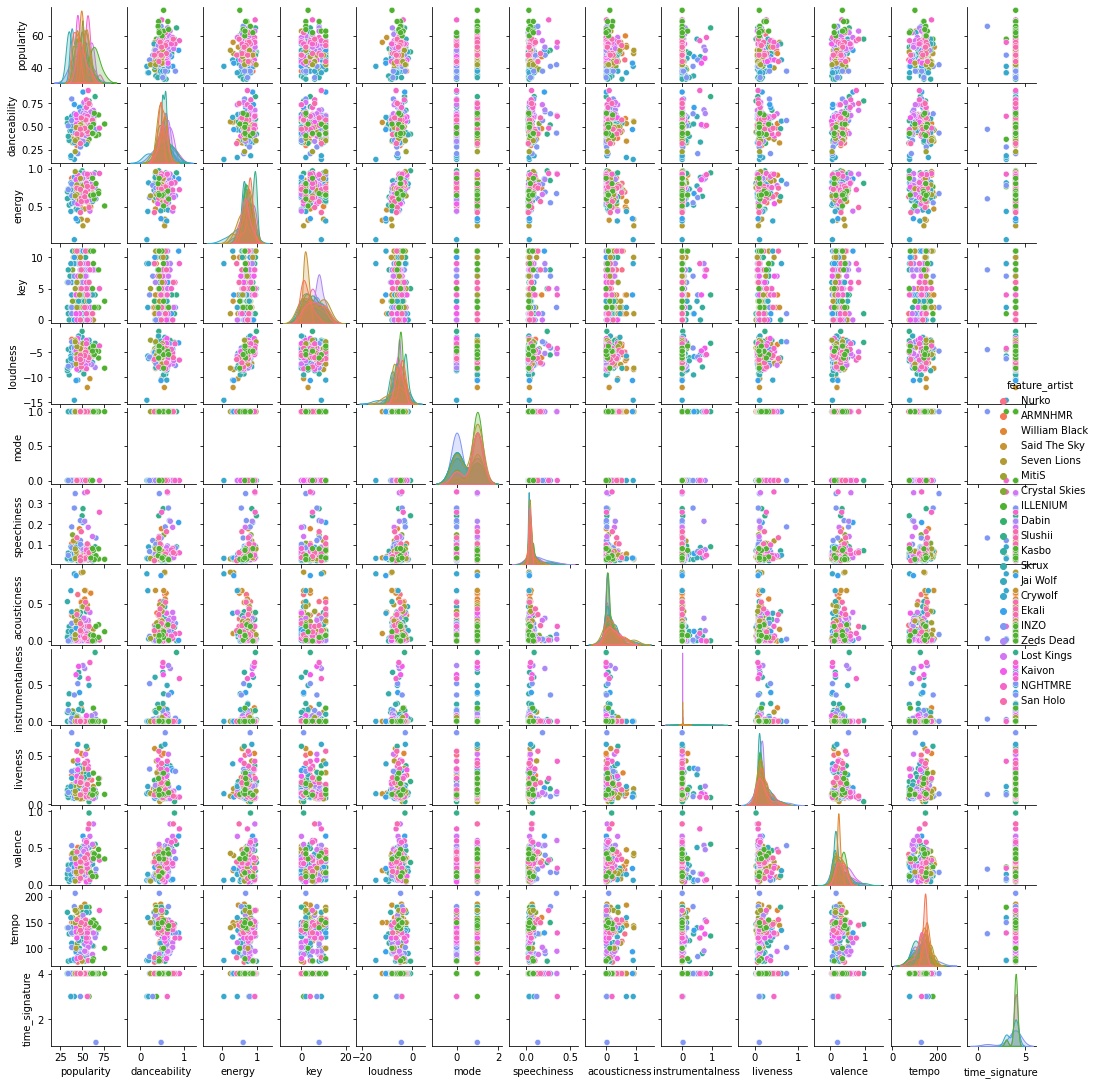

In [5]:
g = sns.pairplot(df, hue='feature_artist')
g.fig.set_size_inches(15,15)

It seems that the features with the highest relationships with popularity are valence (how upbeat/happy the song is) and danceability. This makes sense for the genre. Lets go ahead and check the relationships again - with the tracks aggregated around their feature artist.

In [6]:
new = df.groupby(['feature_artist']).mean()

<AxesSubplot:>

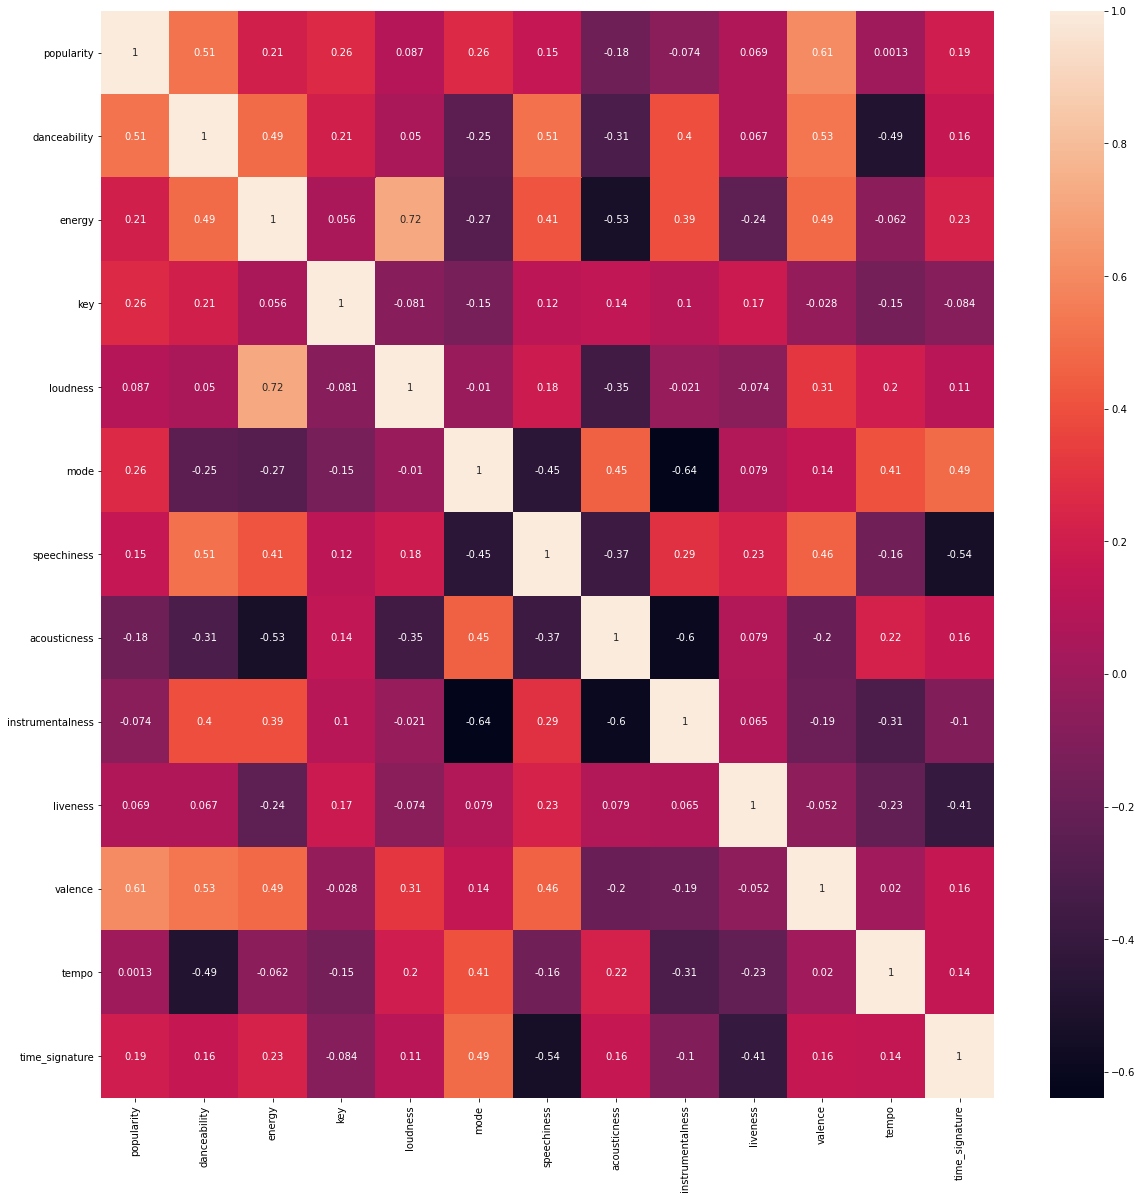

In [7]:
plt.figure(figsize=(20,20))
sns.heatmap(new.corr(), annot=True)

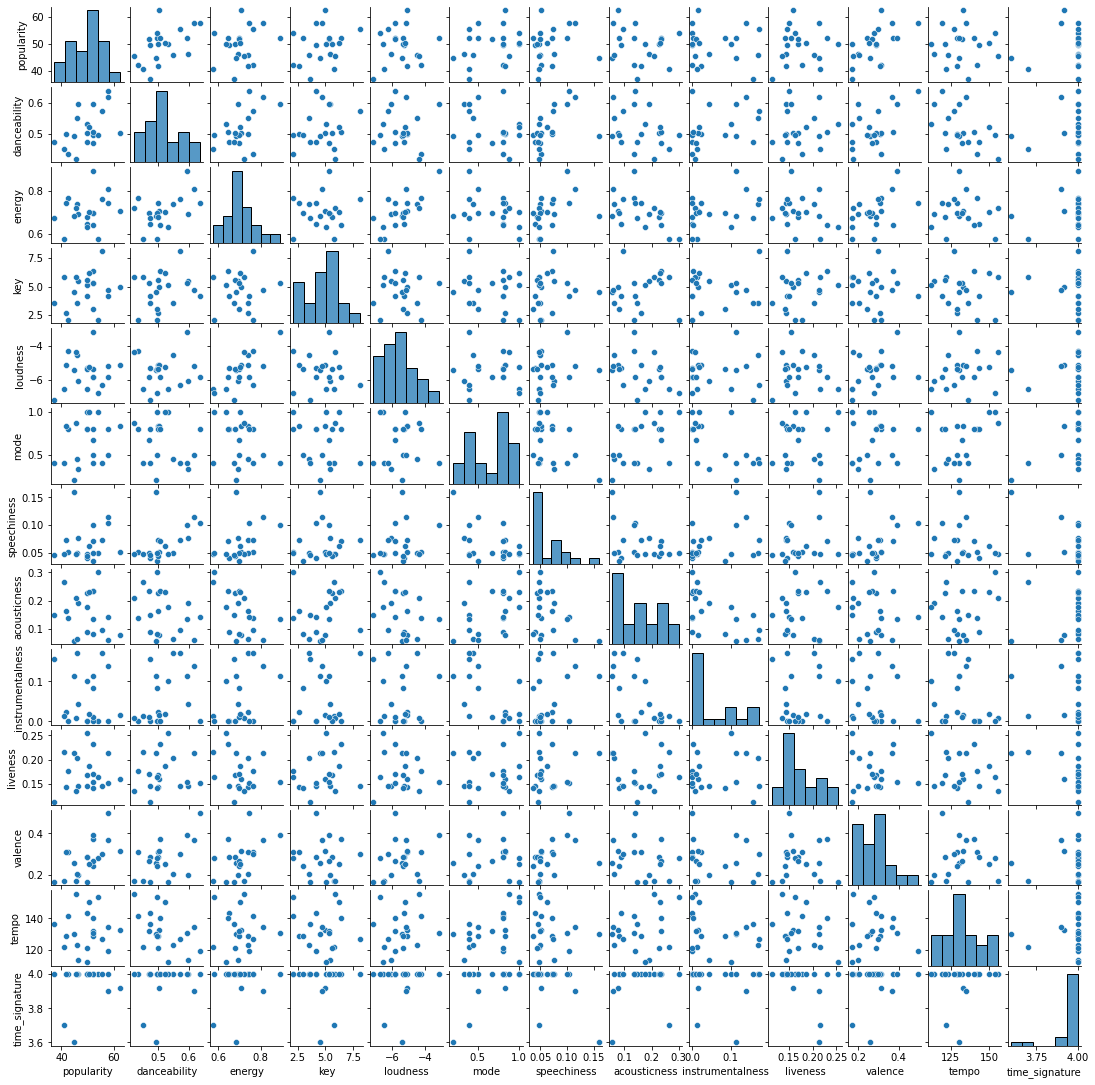

In [8]:
g = sns.pairplot(new)
g.fig.set_size_inches(15,15)

Valence and Danceability still have the highest relationships, but its interesting to see the relationships overall strengthen as we have decreased the volume of our data. These will be two very important features later in our modeling.

So with all of this in mind lets plot out once more with some line plots. The idea here is how does each feature behave as popularity increases. The hope is that as popularity increases, there will be a trend that shows the feature generally increases or decreases. That way our end user can know what features to implement more, and which features to cut down on.

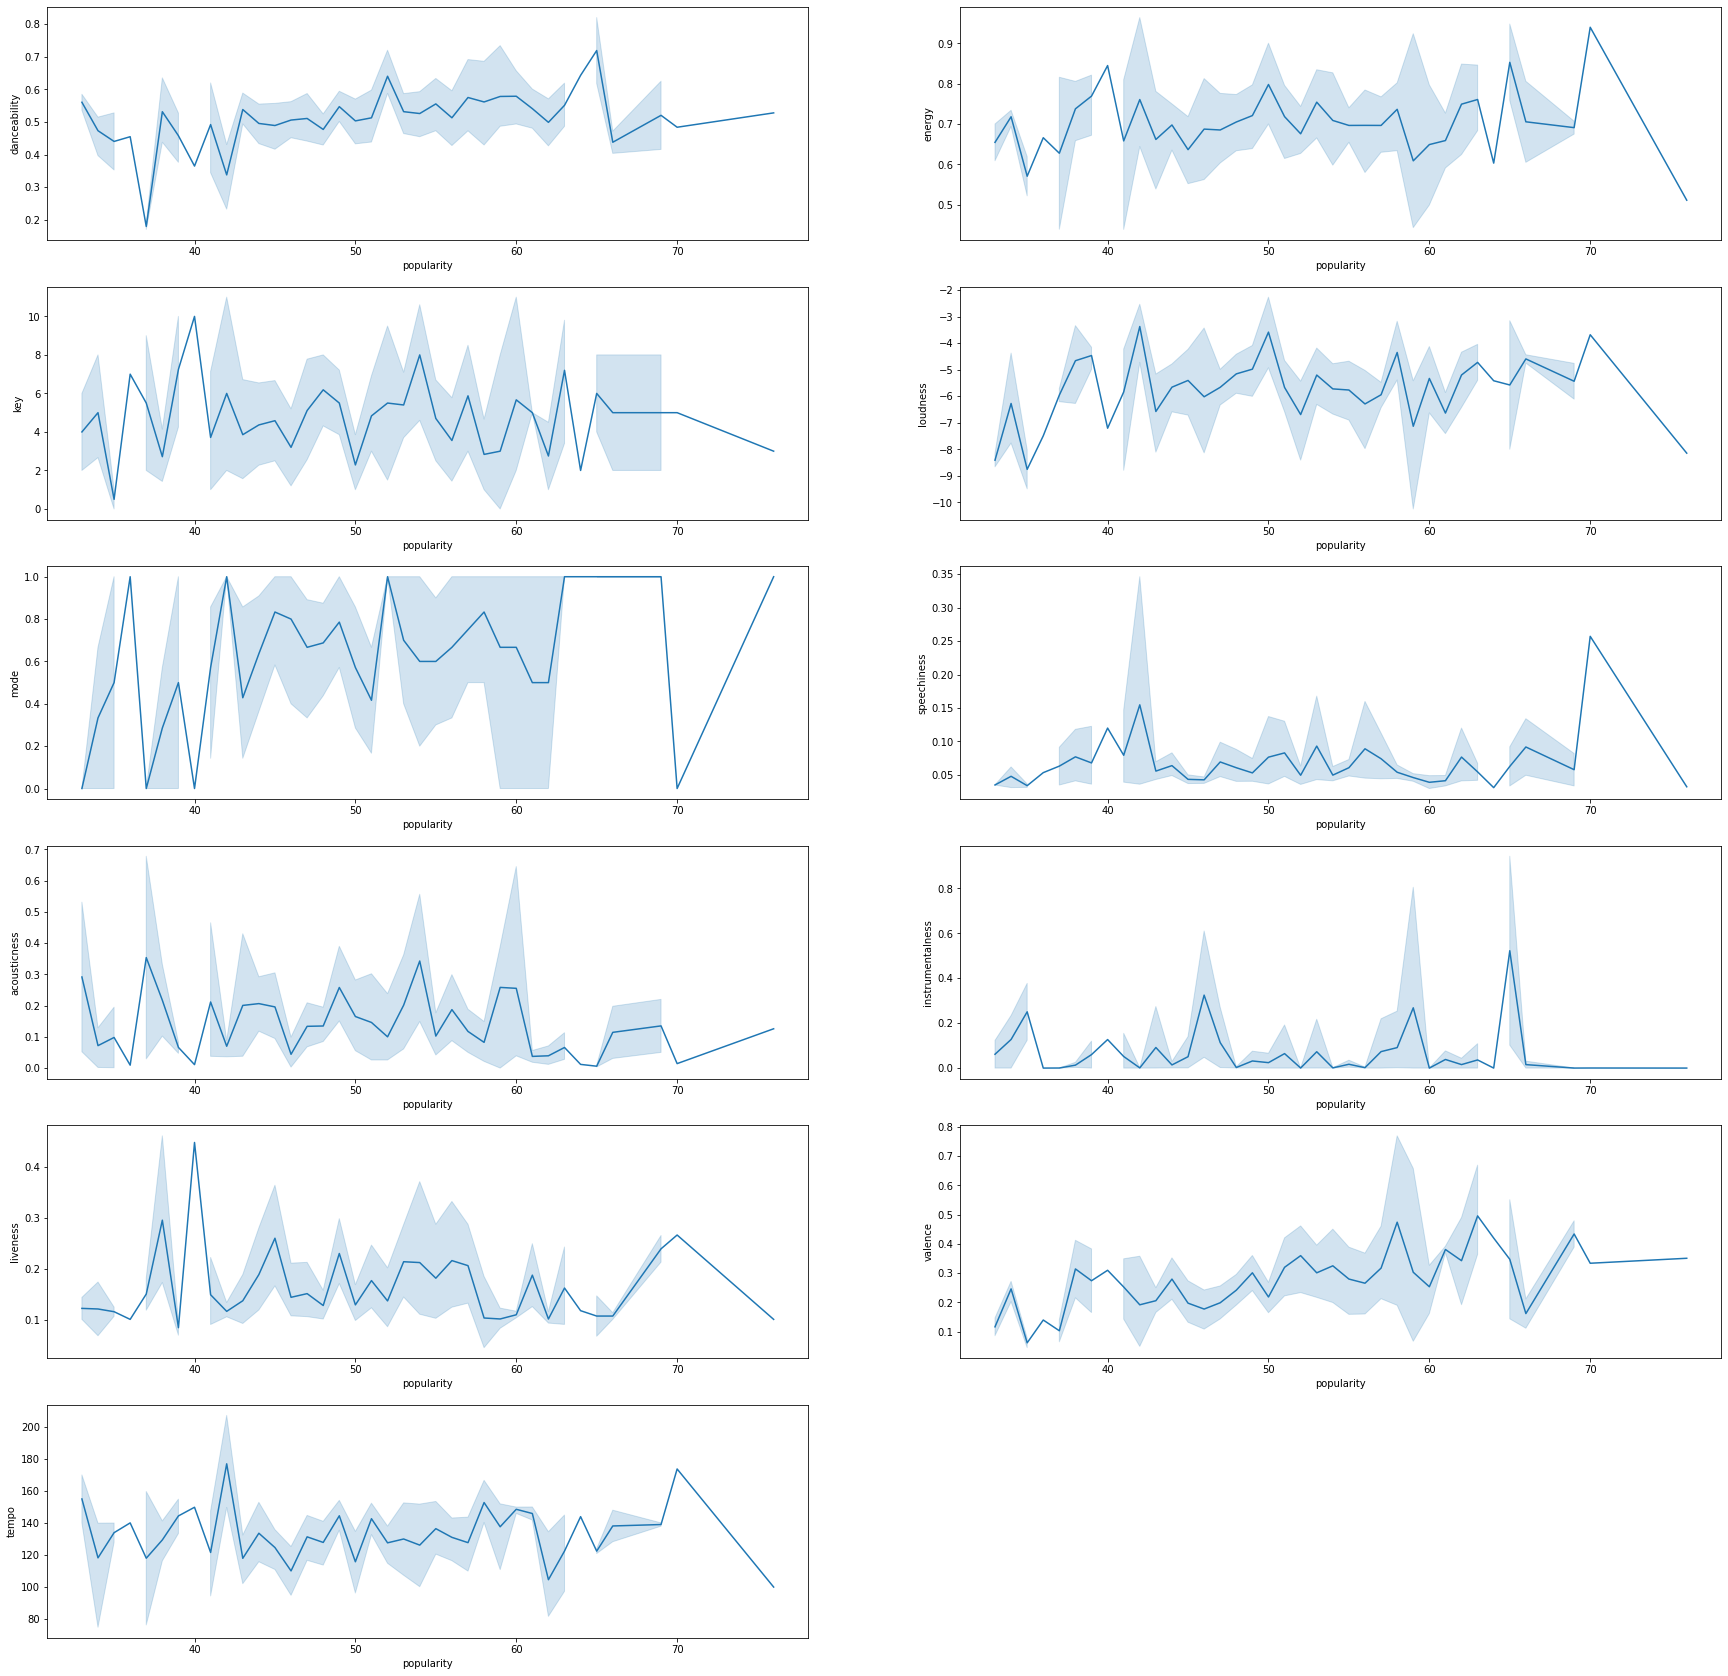

In [9]:
my_cols = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

def my_subplots(plot_type,x_value, y_list,hue=None):
    plt.figure(figsize=(30,30))
    for i in range(len(y_list)):
        plt.subplot(round(len(y_list)/2),2,(i+1))
        plot_type(x=x_value, y=y_list[i],hue=hue,data=df)
        
my_subplots(sns.lineplot,'popularity', my_cols)

It is fascinating to see the general trend with all of these features. In general there are a lot of ways to produce popular tracks, but again it seems that danceability and valence show an overall positive trend (as you generally increase these features, popularity increases). All of the other features generally have weaker relationships. It will be interesting to see how modeling will affect the dataset and what recommendations we will be able to pull from it!

Based on the analysis above, I think that the best models to implement later in the project will be regression. This way we can input values for each feature that will lead to the best output of popularity.